In [ ]:
# 공통 모듈 임포트
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# EDA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project_data.csv',index_col=0 )
data.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
TCGA-A2-A0CT-01A-31R-A056-07,0.744583,-0.45525,0.025250,0.95775,-0.118000,-2.38775,0.071167,-1.14300,-0.712000,0.0340,...,-0.50475,0.031000,0.6257,0.4925,2.75750,1.4367,0.4401,-1.063,-1.0589,1
TCGA-BH-A1EO-01A-11R-A137-07,0.242000,1.06025,0.852750,0.58275,1.862167,-2.99325,-0.205333,-0.27475,-1.743125,0.4170,...,-0.13925,-1.868167,-0.3721,-0.8860,2.66400,-0.4504,0.5558,0.038,0.7616,1
TCGA-BH-A0AW-01A-11R-A056-07,0.078333,1.72000,0.971875,-0.21925,0.505000,-2.50150,-0.059500,-0.10550,-0.155500,1.3965,...,-0.25200,-2.069500,0.6405,-0.0875,2.08150,-1.6684,1.1117,-0.142,0.4646,1
TCGA-B6-A0RM-01A-11R-A084-07,0.475833,-0.03800,0.358625,1.31975,-0.962333,-2.23100,-0.018667,-0.02400,0.598000,0.3830,...,0.11525,-0.865000,0.8152,-0.5630,2.19325,2.6014,0.0516,-0.590,-0.5362,1
TCGA-A8-A08T-01A-21R-A00Z-07,-0.343083,0.79425,0.739500,0.28400,-0.435833,-2.15350,-0.027000,0.31200,-0.472000,0.3090,...,-0.60025,-0.253167,-0.1949,0.3805,2.55125,2.4050,-0.0548,-0.964,-0.4635,1


In [ ]:
data.shape

(590, 17815)

## 데이터 이상치 확인

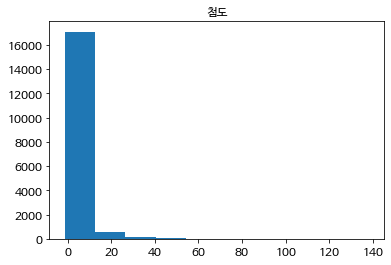

In [ ]:
plt.hist(data.kurtosis())
plt.title('첨도')
plt.show()

In [ ]:
# 첨도가 100 이상인 데이터 확인
kt = data.kurtosis() > 100
data.loc[:,kt]

,HCRT,PRM1,LENG8,TBC1D21
TCGA-A2-A0CT-01A-31R-A056-07,-0.2240,-0.30525,0.17300,0.238500
TCGA-BH-A1EO-01A-11R-A137-07,0.1185,-0.11425,0.03000,0.162167
TCGA-BH-A0AW-01A-11R-A056-07,0.1120,-0.34350,0.39700,0.136500
TCGA-B6-A0RM-01A-11R-A084-07,0.0105,-0.30775,-0.03450,0.316167
TCGA-A8-A08T-01A-21R-A00Z-07,-0.0710,-0.63325,0.18425,-0.054000
...,...,...,...,...
TCGA-B6-A0RO-01A-22R-A084-07,-0.3260,-0.27525,-0.21300,0.215833
TCGA-E2-A15G-01A-11R-A12D-07,-0.1925,-0.50600,-0.23675,-0.276000
TCGA-BH-A0W7-01A-11R-A115-07,-0.3690,-0.14375,-0.48900,0.124167
TCGA-BH-A0BM-11A-12R-A089-07,-0.4615,0.03900,-0.13575,-0.109167


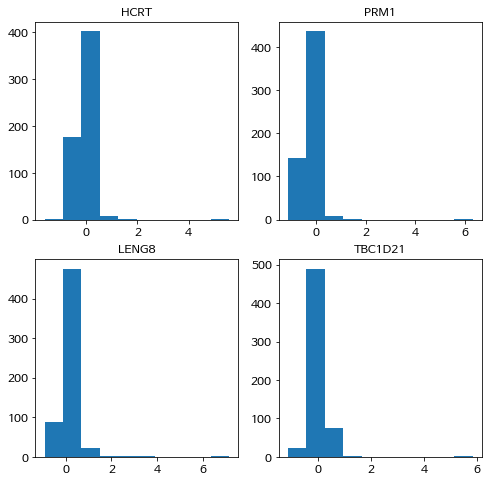

In [ ]:
plt.figure(figsize=(8,8))
for i,d in enumerate(data.loc[:,kt].columns):
    plt.subplot(2,2,i+1)
    plt.hist(data[d])
    plt.title(d) #분포 상 이상 없음

In [ ]:
#HCRT	PRM1	LENG8	TBC1D21
data.loc[(data['HCRT'] > 4) |  (data['PRM1'] > 4) | (data['LENG8'] > 4) | (data['TBC1D21'] > 4), ] #양성 음성 둘다 있음

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
TCGA-AN-A0AR-01A-11R-A00Z-07,-0.144833,-0.66525,1.267750,0.39600,-0.976500,1.067250,-0.354833,0.45650,0.164875,0.5385,...,-0.07275,-0.422000,0.3301,0.430,0.82350,-0.8804,0.5444,-0.1745,1.5650,1
TCGA-AO-A0JL-01A-11R-A056-07,-0.280333,1.20875,0.460500,-0.85600,-0.300000,1.714500,0.596833,-0.19825,-1.541125,1.1900,...,-1.74100,-1.091667,-0.0773,1.038,-0.74825,-2.8591,0.2309,-0.5260,-0.8582,1
TCGA-E2-A153-11A-31R-A12D-07,-0.270818,2.66750,2.191125,-0.99675,3.825667,1.371667,-0.860333,-1.40375,0.208250,3.9070,...,1.20100,1.516667,-0.0346,0.189,1.78125,-2.2335,1.8620,1.4320,1.6107,0


In [ ]:
np.mean(data.loc[(data['HCRT'] > 4) |  (data['PRM1'] > 4) | (data['LENG8'] > 4) | (data['TBC1D21'] > 4), ].mean() - data.mean())

-0.04092056048473328

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


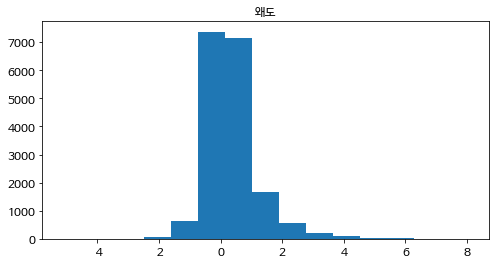

In [ ]:
#왜도
plt.figure(figsize=(8,4))
plt.hist(data.skew(),bins=15)
plt.title('왜도')
plt.show() #큰 문제 없어보임

In [ ]:
# 결측치를 포함한 열들만 출력하는 코드!
na_data = data.drop(data.dropna(axis=1).columns,axis=1) #534개의 결측 열
na_data.isna().sum()

OR2K2        5
ADAM5P      14
KIAA1486     1
C9orf11      2
C8G          1
            ..
OR1J4       14
MLNR         1
SALL3        2
CCDC73       1
RXFP2        1
Length: 534, dtype: int64

In [ ]:
na_data.dropna(axis=0).index #277개의 결측 행
np.sort(na_data.isna().sum(axis=1)) #특정 열에 몰려있는것도 아님

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
data.isin([0]).sum(axis=1) # 결측값은 0이라서 발생하는것은 아님을 확인

TCGA-A2-A0CT-01A-31R-A056-07    0
TCGA-BH-A1EO-01A-11R-A137-07    0
TCGA-BH-A0AW-01A-11R-A056-07    1
TCGA-B6-A0RM-01A-11R-A084-07    2
TCGA-A8-A08T-01A-21R-A00Z-07    0
                               ..
TCGA-B6-A0RO-01A-22R-A084-07    0
TCGA-E2-A15G-01A-11R-A12D-07    2
TCGA-BH-A0W7-01A-11R-A115-07    2
TCGA-BH-A0BM-11A-12R-A089-07    1
TCGA-BH-A0HP-01A-12R-A084-07    3
Length: 590, dtype: int64

## 변수 다중대체법 사용하려했으나 안돌아감

!pip install impyute
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
msno.matrix(data)
total_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(data))
total_impute.isna().sum()

https://www.sloth-lifes.com/entry/MLDL-%EB%8C%80%EC%B2%B4%EB%B2%95%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%EB%8B%A4%EC%A4%91-%EB%8C%80%EC%B2%B4%EB%B2%95-%EC%82%AC%EC%9A%A9%EB%B2%95#:~:text=%EB%8B%A4%EC%A4%91%20%EB%8C%80%EC%B2%B4%EB%A5%BC%20%ED%95%98%EA%B8%B0%20%EC%9C%84%ED%95%B4%EC%84%A0%20impyute%EA%B0%80%20%ED%95%84%EC%9A%94%ED%95%98%EB%8B%A4%20%ED%95%B4%EB%8B%B9%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC,%EB%8C%80%EC%B2%B4%EB%A5%BC%20%ED%95%98%EA%B8%B0%20%EC%9C%84%ED%95%B4%EC%84%A0%20train%EA%B3%BC%20test%EB%A5%BC%20%ED%95%A9%EC%B9%98%EB%8A%94%20%EC%9E%91%EC%97%85%EC%9D%B4%20%ED%95%84%EC%9A%94%ED%95%98%EB%8B%A4.
다중대체법 코드 있는곳

# Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# 중위수로 대체 
data_impute = SimpleImputer(missing_values=np.nan, strategy='median') 
data_impute = pd.DataFrame(data_impute.fit_transform(data), columns = data.columns, index = data.index )
data_impute.isna().sum().sum()

0

## 1.원변수 기본 모델링 (RF)


In [ ]:
from  sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import classification_report

In [ ]:
#scaling
scaler = MinMaxScaler()

data_scale = pd.DataFrame(scaler.fit_transform(data_impute), 
                     index=data_impute.index,
                     columns = data_impute.columns)
data_scale.head(2)

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
TCGA-A2-A0CT-01A-31R-A056-07,0.533173,0.206670,0.296269,0.761041,0.354591,0.347271,0.583598,0.106646,0.403783,0.241629,...,0.472490,0.500472,0.601368,0.442814,0.740000,0.608109,0.577067,0.179909,0.241957,1.0
TCGA-BH-A1EO-01A-11R-A137-07,0.424381,0.533779,0.529507,0.654710,0.678659,0.267592,0.494380,0.358094,0.205048,0.316624,...,0.584212,0.153813,0.366010,0.259808,0.720264,0.385303,0.611481,0.315117,0.645070,1.0


In [ ]:
#data split
X = data_scale.drop(['label'],axis=1)
Y = data_scale['label']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1208)

In [ ]:
print(x_train.shape,  y_test.shape)

(472, 17814) (118,)


In [ ]:
# RF
rf = RF(random_state=1208,class_weight='balanced')
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
tr_score = metrics.f1_score(y_train,rf.predict(x_train))
pred_score = metrics.f1_score(y_test, pred)

In [ ]:
print(tr_score,' ',pred_score) #성능평가

1.0   0.9952606635071091


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.99      1.00       106

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



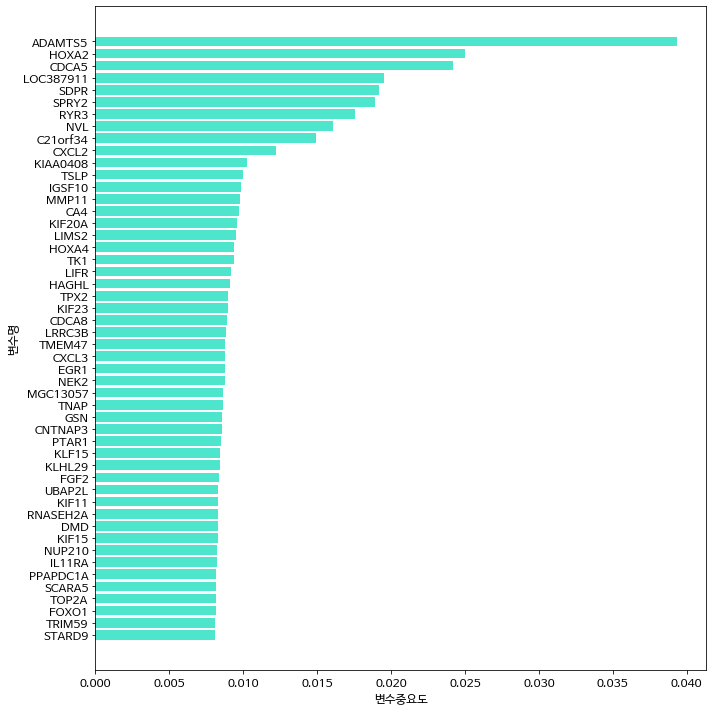

In [ ]:
# 상위 50개 변수중요도
importance = pd.DataFrame(rf.feature_importances_, columns=['importance'])

importance.index = x_train.columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure(figsize=(10,10))
plt.barh(importance.index[-50:], importance.importance[-50:], align='center', color=(0.3,0.9,0.8))
plt.xlabel('변수중요도', size=12)
plt.ylabel('변수명', size=12)
plt.tight_layout()

imp1 = importance.index[-50:]

#### 구글링 해본 유방암 유발 대표적인 유전자: 'ATM', 'BRCA1', 'BRCA2', 'CHEK2', 'PALB2', 'BARD1', 'RAD51C', 'RAD51D', 'TP53'
이들이 기본 model 에 포함되는지 확인해보자

In [ ]:
# 도메인을 활용하여 암 억제 유전자인 BRCA를 찾아보았다.
list2 = ['ATM', 'BRCA1', 'BRCA2', 'CHEK2', 'PALB2', 'BARD1', 'RAD51C', 'RAD51D', 'TP53']

imp_df = pd.DataFrame({"RNA" : importance.index, 
              "imp" : importance.importance})
imp_df.sort_values(by='imp',ascending=False).head()

,RNA,imp
ADAMTS5,ADAMTS5,0.039310
HOXA2,HOXA2,0.025024
CDCA5,CDCA5,0.024170
LOC387911,LOC387911,0.019552
SDPR,SDPR,0.019206


In [ ]:
imp_df.loc[imp_df.RNA.isin(list2),'imp'] #BRCA2 하나만 나온다

RAD51C    0.000000
BRCA1     0.000000
BARD1     0.000000
PALB2     0.000000
TP53      0.000000
CHEK2     0.000000
ATM       0.000000
BRCA2     0.000051
Name: imp, dtype: float64

# 2. feature selection

microarray analysis 는 feature selection 이 주 목적 중 하나인 분석이다.  
이미 기본 모델로도 높은 성능이 나옴  
변수제거로 노이즈를 제거하는것이 아닌 제거하고 남은 변수들의 성능이 17000개의 성능과 동일하다면, 잘 축소했다는 것을 보여주자. 
https://www.dbpia.co.kr/pdf/pdfView.do?nodeId=NODE07129957&googleIPSandBox=false&mark=0&useDate=&ipRange=false&accessgl=Y&language=ko_KR&hasTopBanner=true

https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10671960

https://www.aimspress.com/fileOther/PDF/Bioengineering/bioeng-04-00179.pdf

### 1. Embedded ( lasso )

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
pipeline = Pipeline([
                     ('classifier',LogisticRegression())
                     ])
params = {'classifier__C':[0.001,0.01,0.1,0.3,0.5,1,5,10],
          'classifier__penalty' : ['l1'],
          'classifier__class_weight' : ['balanced'],
          'classifier__solver':['liblinear']}

In [ ]:
search = GridSearchCV(estimator = pipeline,
                      param_grid=params,
                      cv = 5, scoring="f1",verbose=0
                      )
search.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 5,
                                           10],
                         'classifier__class_weight': ['balanced'],
                         'classifier__penalty': ['l1'],
                         'classifier__solver': ['liblinear']},
             scoring='f1')

In [ ]:
print(search.best_score_)
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params', 'mean_test_score']]) 

0.999043062200957
                                              params  mean_test_score
4  {'classifier__C': 0.5, 'classifier__class_weig...         0.999043
5  {'classifier__C': 1, 'classifier__class_weight...         0.999043
7  {'classifier__C': 10, 'classifier__class_weigh...         0.998095
3  {'classifier__C': 0.3, 'classifier__class_weig...         0.998077
6  {'classifier__C': 5, 'classifier__class_weight...         0.997156
2  {'classifier__C': 0.1, 'classifier__class_weig...         0.996172
0  {'classifier__C': 0.001, 'classifier__class_we...         0.000000
1  {'classifier__C': 0.01, 'classifier__class_wei...         0.000000


In [ ]:
logi = LogisticRegression(C=1,class_weight='balanced',
                   solver = 'liblinear',
                   penalty='l1',random_state=1208)
logi.fit(X,Y)

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   random_state=1208, solver='liblinear')

In [ ]:
final = pd.DataFrame({"coef" : logi.coef_[0], 
              "name" : X.columns})

In [ ]:
print(final.loc[final['coef']!=0,'name'].isin(list2).sum()) #0
embedded_1 = list(final.loc[final['coef']!=0,].name)
print(len(embedded_1))
final.loc[final['coef']!=0,]

0
39


,coef,name
331,0.099787,KIF4A
440,-0.001157,PROS1
2444,-0.498857,OXTR
3138,0.359253,MKI67
3806,0.006258,DKFZp762E1312


In [ ]:
rf.fit(x_train.loc[:,embedded_1],y_train) #20개
pred = rf.predict(x_test.loc[:,embedded_1])

print(classification_report(y_test, pred)) # 100퍼센트 분류 성공...

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



###  2. Filter + embedded

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFpr, chi2

In [ ]:
#filter
print(X.shape)
chi_fpr = SelectFpr(chi2, alpha=0.01) #using sklearn selectfpr
X_new = chi_fpr.fit_transform(X, Y)
X_new.shape

(590, 17814)


(590, 1146)

In [ ]:
cols = chi_fpr.get_feature_names_out(X.columns)
print(data_scale.loc[:,cols].columns.isin(list2).sum(),'\n', #none
      data_scale.loc[:,cols].columns.isin(embedded_1).sum()) #all

0 
 39


In [ ]:
rf.fit(x_train.loc[:,cols],y_train) #1146개
pred = rf.predict(x_test.loc[:,cols])

print(classification_report(y_test, pred)) #17000개와 성능이 동일하다

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.99      1.00       106

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



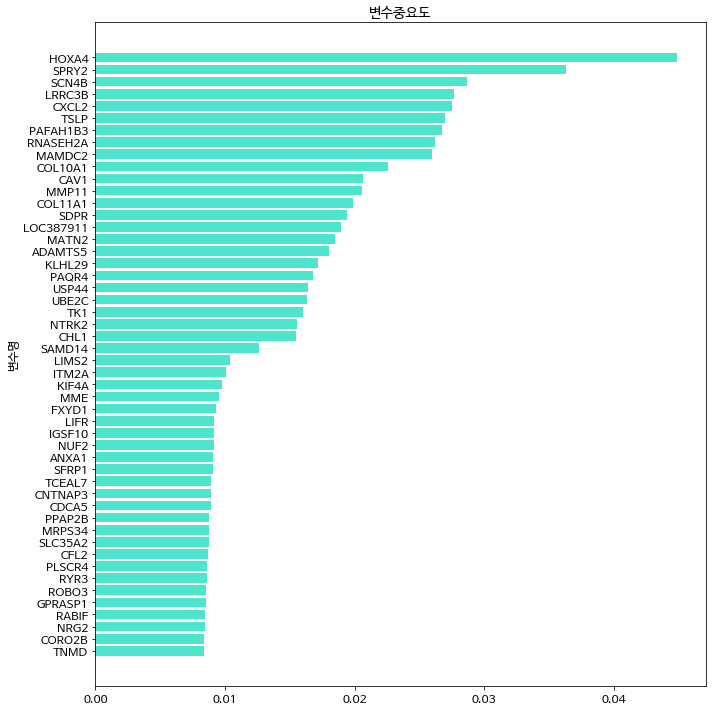

In [ ]:
importance = pd.DataFrame(rf.feature_importances_, columns=['importance'])

importance.index = x_train.loc[:,cols].columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure(figsize=(10,10))
plt.barh(importance.index[-50:], importance.importance[-50:], align='center', color=(0.3,0.9,0.8))
plt.ylabel('변수명', size=12)
plt.title('변수중요도', size=14)
plt.tight_layout()

imp2 = importance.index[-50:]

In [ ]:
set(imp2) & set(embedded_1) # 변수중요도 상위 50개와 교집합 8개

{'CAV1',
 'CNTNAP3',
 'COL10A1',
 'COL11A1',
 'CXCL2',
 'HOXA4',
 'IGSF10',
 'KIF4A',
 'LRRC3B',
 'MME',
 'MMP11',
 'PAQR4',
 'SPRY2',
 'TSLP'}

In [ ]:
X2 = data_scale.loc[:,cols]
Y2 = data_scale.loc[:,'label']

In [ ]:
search.fit(X2,Y2)
print(search.best_score_)
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params', 'mean_test_score']]) 

0.999043062200957
                                              params  mean_test_score
4  {'classifier__C': 0.5, 'classifier__class_weig...         0.999043
5  {'classifier__C': 1, 'classifier__class_weight...         0.999043
7  {'classifier__C': 10, 'classifier__class_weigh...         0.999043
3  {'classifier__C': 0.3, 'classifier__class_weig...         0.998095
6  {'classifier__C': 5, 'classifier__class_weight...         0.998077
2  {'classifier__C': 0.1, 'classifier__class_weig...         0.995206
0  {'classifier__C': 0.001, 'classifier__class_we...         0.000000
1  {'classifier__C': 0.01, 'classifier__class_wei...         0.000000


In [ ]:
logi = LogisticRegression(C=10,class_weight='balanced',
                   solver = 'liblinear',
                   penalty='l1',random_state=1208)
logi.fit(X2,Y2)

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   random_state=1208, solver='liblinear')

In [ ]:
final = pd.DataFrame({"coef" : logi.coef_[0], 
              "name" : X2.columns})
final.loc[final['coef']!=0,]

,coef,name
27,0.155526,KIF4A
33,-0.127450,SNCA
46,-0.034629,hCG_1990170
61,0.277806,ADAR
92,-0.354038,HSPB6
...,...,...
1051,-1.063677,CA4
1053,0.947482,TACC3
1072,0.328273,HIST1H2BD
1095,2.066012,WDR51A


In [ ]:
ft_embd_1 = list(final.loc[final['coef']!=0,'name'])
rf.fit(x_train.loc[:,ft_embd_1],y_train) #65개
pred = rf.predict(x_test.loc[:,ft_embd_1])

print(classification_report(y_test, pred)) # 성능 100퍼센트..

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [ ]:
set(embedded_1) & set(ft_embd_1) #17개

{'ACVR1C',
 'AKR1C1',
 'ARHGAP20',
 'CA4',
 'CAV1',
 'CES1',
 'CNTNAP3',
 'COL10A1',
 'COL11A1',
 'CXCL2',
 'CXCL3',
 'FGFBP1',
 'FIGF',
 'GPD1',
 'HAS3',
 'HOXA4',
 'IGSF10',
 'INHBA',
 'KIF4A',
 'LGALS12',
 'LRRC3B',
 'MKI67',
 'MMP11',
 'PACSIN1',
 'PAQR4',
 'PARP1',
 'RDH5',
 'SCN2B',
 'TACC3',
 'WDR51A',
 'WISP1'}

### 3. Filter + Embedded + Wrapper ( RFE )

In [ ]:
from sklearn.feature_selection import RFE, RFECV

In [ ]:
X2 = data_scale.loc[:,ft_embd_1]
Y2 = data_scale.loc[:,'label']

변수개수 : 23


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


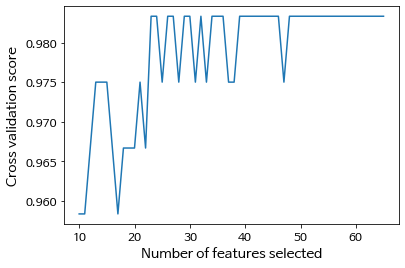

In [ ]:
#1 random forest
rf = RF(random_state=1208,class_weight='balanced')

min_features_to_select = 10
step = 1

selector = RFECV(rf, step=step, cv=StratifiedKFold(5),scoring='recall_macro',
                 min_features_to_select=min_features_to_select)
selector = selector.fit(X2, Y2)

print("변수개수 : %d" % selector.n_features_)
selector.support_.sum()

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.errorbar(
    range(min_features_to_select, len(selector.grid_scores_)*step + min_features_to_select, step),
    selector.cv_results_["mean_test_score"]
)
plt.show()

In [ ]:
rf_rfe = selector.get_feature_names_out(X2.columns)

rf.fit(x_train.loc[:,rf_rfe],y_train) #23개
pred = rf.predict(x_test.loc[:,rf_rfe])

print(classification_report(y_test, pred)) # 성능 100퍼센트.. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



변수개수 : 8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


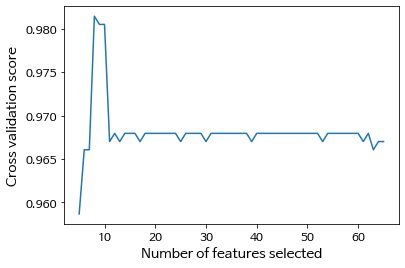

In [ ]:
#2 adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=1208)

min_features_to_select = 5
step = 1

selector = RFECV(ada, step=step, cv=StratifiedKFold(5),scoring='recall_macro',
                 min_features_to_select=min_features_to_select)
selector = selector.fit(X2, Y2)

print("변수개수 : %d" % selector.n_features_)
selector.support_.sum()

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.errorbar(
    range(min_features_to_select, len(selector.grid_scores_)*step + min_features_to_select, step),
    selector.cv_results_["mean_test_score"]
)
plt.show()

In [ ]:
ada_rfe = selector.get_feature_names_out(X2.columns)

rf.fit(x_train.loc[:,ada_rfe],y_train) #8개
pred = rf.predict(x_test.loc[:,ada_rfe])

print(classification_report(y_test, pred)) # 성능 100퍼센트.. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



변수개수: 34


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


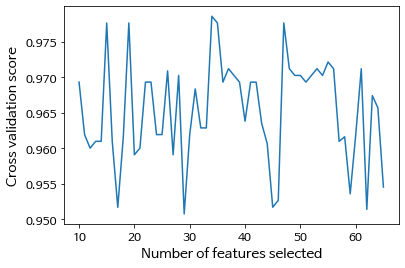

In [ ]:
#3 decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1208)

min_features_to_select = 10
step = 1

selector = RFECV(dt, step=step, cv=StratifiedKFold(5),scoring='recall_macro',
                 min_features_to_select=min_features_to_select)
selector = selector.fit(X2, Y2)

print("변수개수: %d" % selector.n_features_)
selector.support_.sum()

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.errorbar(
    range(min_features_to_select, len(selector.grid_scores_)*step + min_features_to_select, step),
    selector.cv_results_["mean_test_score"]
)
plt.show()

In [ ]:
dt_rfe = selector.get_feature_names_out(X2.columns)

rf.fit(x_train.loc[:,dt_rfe],y_train) #34개
pred = rf.predict(x_test.loc[:,dt_rfe])

print(classification_report(y_test, pred)) # 성능 100퍼센트.. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



변수개수 : 6


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


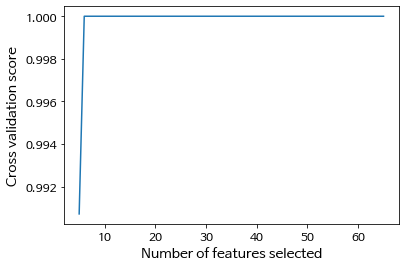

In [ ]:
#4 SVM
from sklearn.svm import SVC
svc = SVC(random_state=1208,kernel='linear')

min_features_to_select = 5
step = 1

selector = RFECV(svc, step=step, cv=StratifiedKFold(5),scoring='recall_macro',
                 min_features_to_select=min_features_to_select)
selector = selector.fit(X2, Y2)

print("변수개수 : %d" % selector.n_features_)
selector.support_.sum()

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.errorbar(
    range(min_features_to_select, len(selector.grid_scores_)*step + min_features_to_select, step),
    selector.cv_results_["mean_test_score"]
)
plt.show()

In [ ]:
svc_rfe = selector.get_feature_names_out(X2.columns)

rf.fit(x_train.loc[:,svc_rfe],y_train) #6개
pred = rf.predict(x_test.loc[:,svc_rfe])

print(classification_report(y_test, pred)) # 성능 100퍼센트.. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [ ]:
print(set(svc_rfe) & set(dt_rfe) & set(ada_rfe) & set(rf_rfe)) #전체 교집합
print(set(dt_rfe) & set(ada_rfe) & set(rf_rfe))
print(set(svc_rfe) & set(rf_rfe)) 
print(set(svc_rfe) & set(dt_rfe)) 
print(set(svc_rfe) & set(ada_rfe))

set()
{'MMP11', 'HOXA4', 'CAV1', 'ANXA1'}
{'COL10A1', 'WISP1', 'WDR51A', 'CA4'}
{'WISP1', 'CCDC36'}
{'COL10A1', 'WDR51A', 'CA4'}


In [ ]:
bc_RNA = list(set(svc_rfe) | set(dt_rfe) | set(ada_rfe) | set(rf_rfe))
len(bc_RNA)

45

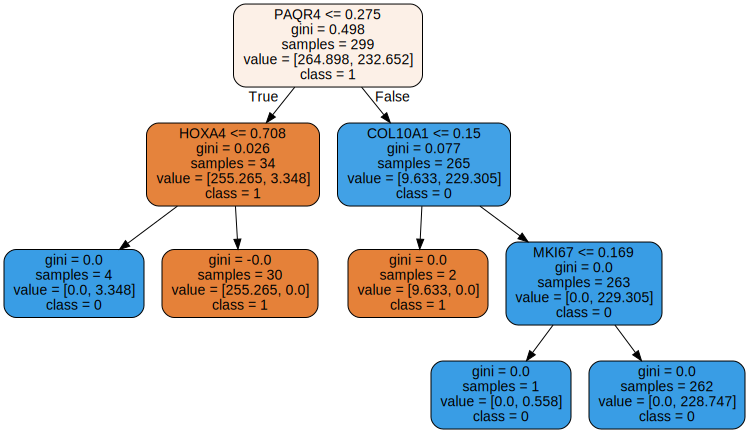

In [ ]:
#트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

rf.fit(x_train.loc[:,rf_rfe],y_train) #6개
estimator = rf.estimators_[3]

export_graphviz(estimator,
                out_file=os.path.join(IMAGES_PATH, "rf_tree3.dot"),
                feature_names = x_train.loc[:,rf_rfe].columns,
                class_names = ['1','0'],
                max_depth = 3,
                precision = 3,
                filled = True,
                rounded=True, 
               )
Source.from_file(os.path.join(IMAGES_PATH, "rf_tree3.dot"))

In [ ]:
data_scale[['HOXA4','label']].groupby(['label']).mean()

,HOXA4
label,
0.0,0.853878
1.0,0.397483


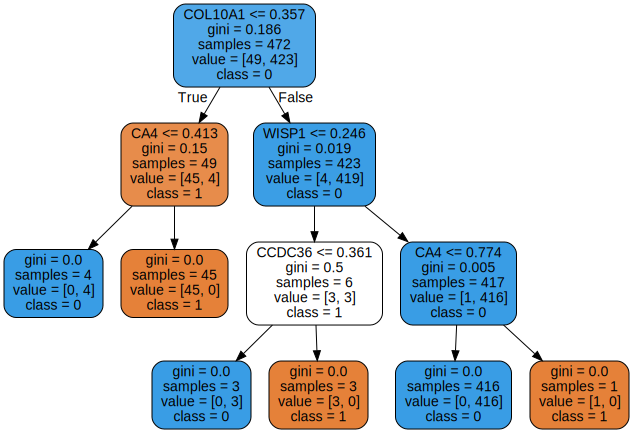

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1208)

dt.fit(x_train.loc[:,svc_rfe],y_train) #6개

export_graphviz(dt,
                out_file=os.path.join(IMAGES_PATH, "svc_tree.dot"),
                feature_names = x_train.loc[:,svc_rfe].columns,
                class_names = ['1','0'],
                max_depth = 3,
                precision = 3,
                filled = True,
                rounded=True,
               )
Source.from_file(os.path.join(IMAGES_PATH, "svc_tree.dot"))

In [ ]:
pred = dt.predict(x_test.loc[:,svc_rfe])

print(classification_report(y_test, pred)) # 성능 100퍼센트.. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [ ]:
bc_RNA.append('label')

In [ ]:
bc_RNA_df = pd.DataFrame(data_scale[bc_RNA].groupby(['label']).mean().transpose())
bc_RNA_df.columns = ['normal','tumor']

In [ ]:
# tumor rna / normal rna
tumor_rna = bc_RNA_df.loc[bc_RNA_df.tumor > bc_RNA_df.normal, ].index
normal_rna = bc_RNA_df.loc[bc_RNA_df.tumor < bc_RNA_df.normal, ].index
print(len(tumor_rna)," ",len(normal_rna))

20   25


In [ ]:
bc_RNA_df.head(10)

,normal,tumor
TPX2,0.171768,0.573984
CXCL3,0.631269,0.249362
RDH5,0.703540,0.245988
AKR1C1,0.670749,0.288893
CCDC36,0.517462,0.263567
IGFBP6,0.686027,0.296151
PAFAH1B3,0.343794,0.687291
OAS2,0.261770,0.521305
KIF4A,0.213486,0.600124
SGK,0.669455,0.378022
